## Importando as Bibliotecas do Python 

In [166]:
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Definição do Problema 

** Haverá diversas reuniões para definição da estratégia de vendas e os relatórios poderão ser extraídos  
sob  demanda,  de  acordo  com  a  necessidade  dos  gestores. ** 

** A empresa está montando a estratégia de vendas para o próximo ano e precisa saber qual dos fabricantes dos produtos vendidos, apresenta melhor desempenho nas vendas. O objetivo é descartar  os  fabricantes  cujos  produtos  possuem  poucas  vendas  e  tentar  negociar  melhores condições com os principais fabricantes. ** 

** Em paralelo a isso, a empresa gostaria de ter diferentes visões das vendas realizadas nos últimos 4 anos (período de 2012 a 2015). Deve ser possível segmentar os relatórios de vendas por  diferentes  informações  e  
por diferentes  ângulos.  Estas  informações  irão  suportar  as estratégias da empresa para o próximo ano. **

** Por  conta  disso,  você deve criar um modelo de dados que permita a extração de relatórios 
a qualquer momento e que permita extrair dados por diferentes visões e ângulos.
Seu trabalho é fazer isso acontecer! ** 


## Logo Marca da Empresa

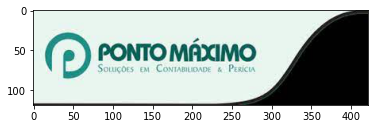

In [167]:
img = mpimg.imread('ponto.jpeg') 
imgplot = plt.imshow(img) 
plt.show()

## Leitura da Planilha de Vendas da Empresa Ponto Máximo 

In [168]:
data = pd.read_excel("Vendas.xlsx")

analise = pd.DataFrame(data)

analise

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89
...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-09-23,1234.00
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-10-24,1234.00
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2015-11-25,1230.00
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-11-26,1234.00


## Verificando Valores Faltantes

In [169]:
analise.isna()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
452,False,False,False,False,False,False,False,False,False,False,False,False
453,False,False,False,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,False,False,False,False,False
455,False,False,False,False,False,False,False,False,False,False,False,False


## Verificação de dados nulos com Soma 

In [170]:
analise.isnull().sum()

ID-Produto     0
Produto        0
Categoria      0
Segmento       0
Fabricante     0
Loja           0
Cidade         0
Estado         0
Vendedor       0
ID-Vendedor    0
Data Venda     0
ValorVenda     0
dtype: int64

## Verificação de dados duplicados 

In [171]:
analise.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
452    False
453    False
454    False
455    False
456    False
Length: 457, dtype: bool

## Informações sobre os dados

In [172]:
analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID-Produto   457 non-null    object        
 1   Produto      457 non-null    object        
 2   Categoria    457 non-null    object        
 3   Segmento     457 non-null    object        
 4   Fabricante   457 non-null    object        
 5   Loja         457 non-null    object        
 6   Cidade       457 non-null    object        
 7   Estado       457 non-null    object        
 8   Vendedor     457 non-null    object        
 9   ID-Vendedor  457 non-null    int64         
 10  Data Venda   457 non-null    datetime64[ns]
 11  ValorVenda   457 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 43.0+ KB


## Estátistica da Planilha de Vendas

In [173]:
analise.describe()

,ID-Vendedor,ValorVenda
count,457.000000,457.000000
mean,1004.091904,790.111838
std,2.456704,755.541075
min,1001.000000,12.000000
25%,1002.000000,167.000000
50%,1004.000000,671.000000
75%,1006.000000,1230.000000
max,1009.000000,3999.000000


## Inserindo Mês, Ano e Dia para a Planilha de Vendas 

In [174]:
analise['Ano'] = analise['Data Venda'].dt.strftime('%Y') 
analise['Mês'] = analise['Data Venda'].dt.strftime('%m')
analise['Dia'] = analise['Data Venda'].dt.strftime('%d')

analise

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Ano,Mês,Dia
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,2012,10,04
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,2012,01,01
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,2012,02,02
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,2012,03,03
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,2012,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-09-23,1234.00,2015,09,23
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-10-24,1234.00,2015,10,24
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2015-11-25,1230.00,2015,11,25
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-11-26,1234.00,2015,11,26


## Excluindo a Coluna de Data Venda

In [175]:
analise_s_data = analise.drop(columns=["Data Venda"])

In [176]:
analise_s_data

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,ValorVenda,Ano,Mês,Dia
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,679.00,2012,10,04
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,832.00,2012,01,01
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,790.00,2012,02,02
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,765.32,2012,03,03
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,459.89,2012,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,1234.00,2015,09,23
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,1234.00,2015,10,24
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,1230.00,2015,11,25
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,1234.00,2015,11,26


## Definindo as Tarefas para analise de dados de Vendas 

** Vendas por Ano ** 

* Total de Vendas
* Média de Vendas 
* Quartile 
* Mediana 
* Desvio Padrão 
* Variância 

** Vendas por Mês **

* Total de Vendas
* Média de Vendas 
* Quartile 
* Mediana 
* Desvio Padrão 
* Variância 

** Vendas por Loja **

* Contagem de Lojas
* Total de Vendas 
* Média de Vendas 
* Quartile 
* Desvio Padrão 
* Variância 

** ID Vendedor, Vendedores por Valor de Venda ** 

* Quantidade de ID Vendedor
* Quantidade de Vendedores
* Total de Vendas por Vendedores
* Média de Vendas por Vendedores
* Quartile
* Desvio Padrão 
* Variância

** Fabricante, Produto, Categoria, Segmento por Valor de Venda ** 

* Total de Vendas 
* Média de Vendas 
* Mediana
* Quartile 
* Desvio Padrão 
* Variância 

** Cidade, Estado por Valor de Venda ** 

* Total de Vendas 
* Média de Vendas 
* Mediana
* Quartile 
* Desvio Padrão 
* Variância 

## Análise de Ano por Valor de Venda

In [184]:
total_ano = analise_s_data.groupby(["Ano"]).sum()["ValorVenda"].rename("Total de Vendas")
media_ano = analise_s_data.groupby(["Ano"]).mean()["ValorVenda"].rename("Média de Vendas")
quartil = analise_s_data.groupby(["Ano"]).quantile(0.50)["ValorVenda"].rename("Quartil")
desvio = analise_s_data.groupby(["Ano"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = analise_s_data.groupby(["Ano"]).var()["ValorVenda"].rename("Variância")


analise_a_v = pd.DataFrame({"Total de Vendas" : total_ano, 
                            "Média de Vendas" : media_ano,
                            "Quartil" : quartil, 
                            "Desvio Padrão" : desvio, 
                            "Variância" : variancia})

analise_a_v["Total de Vendas"] = analise_a_v["Total de Vendas"].map("R$ {:,.2f}".format)
analise_a_v["Média de Vendas"] = analise_a_v["Média de Vendas"].map("R$ {:,.2f}".format) 
analise_a_v["Quartil"] = analise_a_v["Quartil"].map("R$ {:,.2f}".format)
analise_a_v["Desvio Padrão"] = analise_a_v["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_a_v["Variância"] = analise_a_v["Variância"].map("R$ {:,.2f}".format)

analise_a_v

,Total de Vendas,Média de Vendas,Quartil,Desvio Padrão,Variância
Ano,,,,,
2012,"R$ 37,503.74",R$ 961.63,"R$ 1,190.98",R$ 406.84,"R$ 165,517.51"
2013,"R$ 93,418.56",R$ 812.34,R$ 789.34,R$ 616.99,"R$ 380,680.40"
2014,"R$ 63,322.02",R$ 822.36,R$ 455.00,R$ 962.45,"R$ 926,309.90"
2015,"R$ 166,836.79",R$ 738.22,R$ 455.50,R$ 784.08,"R$ 614,775.03"


## Análise de Mês por Valor de Venda

In [192]:
total_mes = analise_s_data.groupby(["Mês"]).sum()["ValorVenda"].rename("Total de Vendas")
media_mes = analise_s_data.groupby(["Mês"]).mean()["ValorVenda"].rename("Média de Vendas")
quartil = analise_s_data.groupby(["Mês"]).quantile(0.50)["ValorVenda"].rename("Quartil") 
desvio = analise_s_data.groupby(["Mês"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = analise_s_data.groupby(["Mês"]).var()["ValorVenda"].rename("Variância")

analise_m_vv = pd.DataFrame({"Total de Vendas" : total_mes, 
                             "Média de Vendas" : media_mes, 
                             "Quartil" : quartil, 
                             "Desvio Padrão" : desvio, 
                             "Variância" : variancia}) 

analise_m_vv["Total de Vendas"] = analise_m_vv["Total de Vendas"].map("R$ {:,.2f}".format)
analise_m_vv["Média de Vendas"] = analise_m_vv["Média de Vendas"].map("R$ {:,.2f}".format)
analise_m_vv["Quartil"] = analise_m_vv["Quartil"].map("R$ {:,.2f}".format)
analise_m_vv["Desvio Padrão"] = analise_m_vv["Desvio Padrão"].map("R$ {:,.2f}".format) 
analise_m_vv["Variância"] = analise_m_vv["Variância"].map("R$ {:,.2f}".format) 

analise_m_vv

,Total de Vendas,Média de Vendas,Quartil,Desvio Padrão,Variância
Mês,,,,,
01,"R$ 25,644.31",R$ 674.85,R$ 501.00,R$ 489.21,"R$ 239,323.55"
02,"R$ 32,336.46",R$ 898.24,R$ 788.00,R$ 881.29,"R$ 776,672.80"
03,"R$ 34,626.12",R$ 844.54,R$ 713.00,R$ 859.30,"R$ 738,399.82"
04,"R$ 34,562.08",R$ 909.53,R$ 739.23,R$ 871.81,"R$ 760,058.85"
05,"R$ 36,864.53",R$ 877.73,R$ 695.00,R$ 834.71,"R$ 696,745.22"
06,"R$ 26,223.48",R$ 749.24,R$ 655.00,R$ 730.85,"R$ 534,146.10"
07,"R$ 32,777.74",R$ 840.45,R$ 456.00,R$ 880.53,"R$ 775,328.92"
08,"R$ 20,564.26",R$ 623.16,R$ 345.00,R$ 752.91,"R$ 566,874.87"
09,"R$ 28,391.93",R$ 767.35,R$ 632.00,R$ 750.24,"R$ 562,864.87"


## Número de Lojas

In [199]:
quant_loja = len(analise_s_data["Loja"].unique()) 

analise_loja = pd.DataFrame({"Número de Lojas" : [quant_loja]}) 
analise_loja

,Número de Lojas
0,14


## Análise Geral de Lojas por Valor de Vendas

In [223]:
total_loja = analise_s_data.groupby(["Loja"]).sum()["ValorVenda"].rename("Total de Vendas")
media_loja = analise_s_data.groupby(["Loja"]).mean()["ValorVenda"].rename("Média de Vendas")
quartil = analise_s_data.groupby(["Loja"]).quantile(0.50)["ValorVenda"].rename("Quartil")
desvio = analise_s_data.groupby(["Loja"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = analise_s_data.groupby(["Loja"]).var()["ValorVenda"].rename("Variância")

analise_l_vv = pd.DataFrame({"Total de Vendas" : total_loja, 
                             "Média de Vendas" : media_loja, 
                             "Quartil" : quartil,
                             "Desvio Padrão" : desvio,
                             "Variância" : variancia})

analise_l_vv["Total de Vendas"] = analise_l_vv["Total de Vendas"].map("R$ {:,.2f}".format)
analise_l_vv["Média de Vendas"] = analise_l_vv["Média de Vendas"].map("R$ {:,.2f}".format)
analise_l_vv["Quartil"] = analise_l_vv["Quartil"].map("R$ {:,.2f}".format)
analise_l_vv["Desvio Padrão"] = analise_l_vv["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_l_vv["Variância"] = analise_l_vv["Variância"].map("R$ {:,.2f}".format)

analise_l_vv

,Total de Vendas,Média de Vendas,Quartil,Desvio Padrão,Variância
Loja,,,,,
A9990,"R$ 28,282.87",R$ 912.35,R$ 877.00,R$ 740.71,"R$ 548,644.01"
A9991,"R$ 10,016.00","R$ 1,112.89","R$ 1,230.00",R$ 297.95,"R$ 88,776.11"
B7659,"R$ 7,998.00","R$ 3,999.00","R$ 3,999.00",R$ 0.00,R$ 0.00
P0761,"R$ 2,265.90",R$ 323.70,R$ 290.00,R$ 240.37,"R$ 57,779.36"
R1295,"R$ 50,677.90",R$ 569.41,R$ 455.00,R$ 436.38,"R$ 190,431.22"
R1296,"R$ 50,843.66",R$ 996.93,"R$ 1,230.00",R$ 415.50,"R$ 172,639.13"
R1297,"R$ 2,515.45",R$ 179.67,R$ 149.00,R$ 172.64,"R$ 29,806.17"
R1298,"R$ 5,031.00",R$ 419.25,R$ 149.00,R$ 488.90,"R$ 239,023.84"
S6543,"R$ 12,621.00","R$ 1,803.00",R$ 189.00,"R$ 2,054.26","R$ 4,219,977.00"


## Seperação de Colunas para ID Vendedor, Vendedor e ValorVenda

In [264]:
id_vendedor_venda = analise_s_data.loc[:, ["ID-Vendedor", "Vendedor", "ValorVenda"]]
id_vendedor_venda.head(60)

,ID-Vendedor,Vendedor,ValorVenda
0,1009,Ana Teixeira,679.00
1,1006,Josias Silva,832.00
2,1006,Josias Silva,790.00
3,1003,Mateus Gonçalves,765.32
4,1004,Artur Moreira,459.89
5,1005,Rodrigo Fagundes,590.98
6,1006,Josias Silva,1000.91
7,1007,Fernando Zambrini,1229.00
8,1003,Mateus Gonçalves,1300.00
9,1002,André Pereira,1290.00


## Total de Vendedores 

In [267]:
id_vend = len(id_vendedor_venda["ID-Vendedor"].unique())
vend_cont = len(id_vendedor_venda["Vendedor"].unique())

analise_id = pd.DataFrame({"Total de Id" : [id_vend], 
                           "Total de Vendedores" : [vend_cont]}) 

analise_id

,Total de Id,Total de Vendedores
0,9,9


## Análise Geral de Vendedores por Total de Vendas 

In [281]:
total_vend_id = id_vendedor_venda.groupby(["ID-Vendedor", "Vendedor"]).sum()["ValorVenda"].rename("Total de Vendas")
media_vend_id = id_vendedor_venda.groupby(["ID-Vendedor", "Vendedor"]).mean()["ValorVenda"].rename("Média de Vendas")
quartile = id_vendedor_venda.groupby(["ID-Vendedor", "Vendedor"]).quantile(0.50)["ValorVenda"].rename("Quartile")
desvio = id_vendedor_venda.groupby(["ID-Vendedor", "Vendedor"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = id_vendedor_venda.groupby(["ID-Vendedor", "Vendedor"]).var()["ValorVenda"].rename("Variância")


analise_vendendor = pd.DataFrame({"Total de Vendas" : total_vend_id, 
                                  "Média de Vendas" : media_vend_id,
                                  "Quartile" : quartile, 
                                  "Desvio Padrão" : desvio, 
                                  "Variância" : variancia})

analise_vendendor["Total de Vendas"] = analise_vendendor["Total de Vendas"].map("R$ {:,.2f}".format)
analise_vendendor["Média de Vendas"] = analise_vendendor["Média de Vendas"].map("R$ {:,.2f}".format) 
analise_vendendor["Quartile"] = analise_vendendor["Quartile"].map("R$ {:,.2f}".format)
analise_vendendor["Desvio Padrão"] = analise_vendendor["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_vendendor["Variância"] = analise_vendendor["Variância"].map("R$ {:,.2f}".format)

analise_vendendor

,,Total de Vendas,Média de Vendas,Quartile,Desvio Padrão,Variância
ID-Vendedor,Vendedor,,,,,
1001,Maria Fernandes,"R$ 55,997.66",R$ 727.24,R$ 455.00,R$ 718.28,"R$ 515,920.22"
1002,André Pereira,"R$ 87,964.89","R$ 1,047.20","R$ 1,230.00",R$ 869.92,"R$ 756,769.39"
1003,Mateus Gonçalves,"R$ 36,353.69",R$ 712.82,R$ 566.00,R$ 699.31,"R$ 489,040.88"
1004,Artur Moreira,"R$ 49,944.79",R$ 876.22,R$ 567.00,"R$ 1,054.45","R$ 1,111,857.55"
1005,Rodrigo Fagundes,"R$ 23,777.16",R$ 495.36,R$ 444.00,R$ 382.20,"R$ 146,080.31"
1006,Josias Silva,"R$ 50,544.17",R$ 815.23,R$ 853.50,R$ 632.93,"R$ 400,601.26"
1007,Fernando Zambrini,"R$ 21,225.64",R$ 707.52,R$ 665.00,R$ 515.01,"R$ 265,230.75"
1008,Aline Sutter,"R$ 6,051.99",R$ 605.20,R$ 389.50,R$ 468.62,"R$ 219,602.66"
1009,Ana Teixeira,"R$ 29,221.12",R$ 768.98,R$ 696.00,R$ 721.09,"R$ 519,975.15"


## Separação de colunas Produto, Categoria, Segmento, Fabricante, Estado, Cidade por Valor de Venda


In [283]:
data1 = analise_s_data.loc[:, ["Produto", "Categoria", "Segmento", "Fabricante", "Cidade", "Estado", "ValorVenda"]]
data1

,Produto,Categoria,Segmento,Fabricante,Cidade,Estado,ValorVenda
0,LG K10 TV Power,Celulares,Corporativo,LG,São Paulo,São Paulo,679.00
1,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,São Paulo,São Paulo,832.00
2,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,São Paulo,São Paulo,790.00
3,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,São Paulo,São Paulo,765.32
4,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,São Paulo,São Paulo,459.89
...,...,...,...,...,...,...,...
452,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,Rio de Janeiro,Rio de Janeiro,1234.00
453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,Rio de Janeiro,Rio de Janeiro,1234.00
454,Morotola Moto G5,Celulares,Doméstico,Motorola,Rio de Janeiro,Rio de Janeiro,1230.00
455,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,Rio de Janeiro,Rio de Janeiro,1234.00


## Análise Geral de Fabricante, Produto, Categoria, Segmento por Valor de Venda

In [298]:
total_data = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).sum()["ValorVenda"].rename("Total")
media_data = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).mean()["ValorVenda"].rename("Média")
mediana_data = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).median()["ValorVenda"].rename("Mediana")
quartil = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).quantile(0.50)["ValorVenda"].rename("Quartil")
desvio = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = data1.groupby(["Fabricante", "Produto", "Categoria", "Segmento"]).std()["ValorVenda"].rename("Variância")

analise_geral = pd.DataFrame({"Total" : total_data, 
                              "Média" : media_data,
                              "Mediana" : mediana_data,
                              "Quartil" : quartil,
                              "Desvio Padrão" : desvio, 
                              "Variância" : variancia})

analise_geral["Total"] = analise_geral["Total"].map("R$ {:,.2f}".format)
analise_geral["Média"] = analise_geral["Média"].map("R$ {:,.2f}".format)
analise_geral["Mediana"] = analise_geral["Mediana"].map("R$ {:,.2f}".format)
analise_geral["Quartil"] = analise_geral["Quartil"].map("R$ {:,.2f}".format)
analise_geral["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_geral["Variância"] = analise_geral["Variância"].map("R$ {:,.2f}".format)

analise_geral

Total  \
Fabricante Produto                  Categoria        Segmento                    
Arno       Fritadeira               Eletroportáteis  Doméstico     R$ 2,675.00   
           Liquidificador           Eletroportáteis  Doméstico     R$ 1,136.00   
           Ventilador               Eletroportáteis  Doméstico     R$ 2,934.00   
Brastemp   Geladeira Duplex         Eletrodomésticos Doméstico    R$ 82,293.45   
           Lavadora 11 Kg           Eletrodomésticos Doméstico     R$ 8,938.74   
           Secadora Vapor           Eletrodomésticos Doméstico     R$ 7,976.11   
Britânia   Aspirador                Eletroportáteis  Doméstico    R$ 10,373.45   
Consul     Forno-Micro-Ondas        Eletrodomésticos Doméstico     R$ 4,675.79   
           Geladeira Duplex         Eletrodomésticos Doméstico    R$ 37,011.87   
           Grill                    Eletrodomésticos Doméstico     R$ 1,188.00   
           Micro-Ondas              Eletrodomésticos Doméstico    R$ 17,352.13   
                                                     Industrial      R$ 459.00   
Dell       Notebook Dell 8 GB       Eletrônicos      Corporativo  R$ 12,823.54   
Electrolux Geladeira Duplex         Eletrodomésticos Doméstico     R$ 2,519.00   
           Lavadora 11 Kg           Eletrodomésticos Doméstico     R$ 4,171.02   
Epson      Impressora Deskjet       Eletrônicos      Doméstico     R$ 7,872.46   
HP         Desktop HP 16 GB         Eletrônicos      Corporativo  R$ 14,566.11   
           Impressora Deskjet       Eletrônicos      Doméstico    R$ 13,067.44   
LG         LG K10 TV Power          Celulares        Corporativo     R$ 679.00   
Motorola   Morotola Moto G5         Celulares        Doméstico    R$ 35,670.00   
Panasonic  Forno-Micro-Ondas        Eletrodomésticos Doméstico     R$ 1,925.00   
           Grill                    Eletrodomésticos Doméstico       R$ 711.00   
           Micro-Ondas              Eletrodomésticos Doméstico    R$ 10,937.00   
Philco     Processador de Alimentos Eletroportáteis  Doméstico     R$ 1,937.00   
Samsung    Ar Condicionado          Eletrodomésticos Doméstico     R$ 2,510.00   
                                                     Industrial   R$ 12,096.00   
           Samsung Galaxy 8         Celulares        Corporativo  R$ 61,884.00   
Sony       Sony Experia XA          Celulares        Doméstico       R$ 699.00   

                                                                        Média  \
Fabricante Produto                  Categoria        Segmento                   
Arno       Fritadeira               Eletroportáteis  Doméstico      R$ 133.75   
           Liquidificador           Eletroportáteis  Doméstico      R$ 142.00   
           Ventilador               Eletroportáteis  Doméstico      R$ 133.36   
Brastemp   Geladeira Duplex         Eletrodomésticos Doméstico    R$ 1,159.06   
           Lavadora 11 Kg           Eletrodomésticos Doméstico      R$ 812.61   
           Secadora Vapor           Eletrodomésticos Doméstico      R$ 664.68   
Britânia   Aspirador                Eletroportáteis  Doméstico      R$ 170.06   
Consul     Forno-Micro-Ondas        Eletrodomésticos Doméstico      R$ 584.47   
           Geladeira Duplex         Eletrodomésticos Doméstico    R$ 1,000.32   
           Grill                    Eletrodomésticos Doméstico      R$ 237.60   
           Micro-Ondas              Eletrodomésticos Doméstico      R$ 510.36   
                                                     Industrial     R$ 459.00   
Dell       Notebook Dell 8 GB       Eletrônicos      Corporativo  R$ 1,282.35   
Electrolux Geladeira Duplex         Eletrodomésticos Doméstico    R$ 1,259.50   
           Lavadora 11 Kg           Eletrodomésticos Doméstico      R$ 834.20   
Epson      Impressora Deskjet       Eletrônicos      Doméstico      R$ 656.04   
HP         Desktop HP 16 GB         Eletrônicos      Corporativo  R$ 1,040.44   
           Impressora Deskjet       Eletrônicos      Doméstico      R$ 54

## Análise Geral de Estado, Cidade por Valor de venda 

In [306]:
total_es_ci = data1.groupby(["Estado", "Cidade"]).sum()["ValorVenda"].rename("Total")
media_es_ci = data1.groupby(["Estado", "Cidade"]).mean()["ValorVenda"].rename("Média")
quartil = data1.groupby(["Estado", "Cidade"]).quantile()["ValorVenda"].rename("Quartil")
desvio = data1.groupby(["Estado", "Cidade"]).std()["ValorVenda"].rename("Desvio Padrão")
variancia = data1.groupby(["Estado", "Cidade"]).var()["ValorVenda"].rename("Variância")

analise_geral = pd.DataFrame({"Total" : total_es_ci, 
                              "Média" : media_es_ci,
                              "Quartil" : quartil,
                              "Desvio Padrão" : desvio, 
                              "Variância" : variancia})

analise_geral["Total"] = analise_geral["Total"].map("R$ {:,.2f}".format)
analise_geral["Média"] = analise_geral["Média"].map("R$ {:,.2f}".format)
analise_geral["Quartil"] = analise_geral["Quartil"].map("R$ {:,.2f}".format)
analise_geral["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_geral["Variância"] = analise_geral["Variância"].map("R$ {:,.2f}".format)

analise_geral

Total        Média      Quartil  \
Estado         Cidade                                                    
Bahia          Salvador          R$ 2,940.00    R$ 735.00    R$ 710.00   
Espírito Santo Vitória          R$ 24,803.77    R$ 953.99    R$ 820.50   
Minas Gerais   Belo Horizonte   R$ 38,298.87    R$ 957.47  R$ 1,201.00   
Paraná         Cascavel          R$ 2,265.90    R$ 323.70    R$ 290.00   
Rio de Janeiro Campos            R$ 5,031.00    R$ 419.25    R$ 149.00   
               Petrópolis        R$ 2,515.45    R$ 179.67    R$ 149.00   
               Rio de Janeiro  R$ 101,521.56    R$ 725.15    R$ 554.50   
São Paulo      Campinas          R$ 7,998.00  R$ 3,999.00  R$ 3,999.00   
               Osasco           R$ 12,621.00  R$ 1,803.00    R$ 189.00   
               São Paulo       R$ 163,085.56    R$ 795.54    R$ 679.00   

                              Desvio Padrão        Variância  
Estado         Cidade                                         
Bahia          Salvador           R$ 710.16    R$ 504,328.00  
Espírito Santo Vitória            R$ 784.98    R$ 616,188.39  
Minas Gerais   Belo Horizonte     R$ 668.91    R$ 447,436.74  
Paraná         Cascavel           R$ 240.37     R$ 57,779.36  
Rio de Janeiro Campos             R$ 488.90    R$ 239,023.84  
               Petrópolis         R$ 172.64     R$ 29,806.17  
               Rio de Janeiro     R$ 474.65    R$ 225,292.62  
São Paulo      Campinas             R$ 0.00          R$ 0.00  
               Osasco           R$ 2,054.26  R$ 4,219,977.00  
               São Paulo          R$ 790.09    R$ 624,236.39